In [3]:

import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

file_path= "C:\\Users\\debar\\OneDrive\\Desktop\\input_file.csv"
df= pd.read_csv(file_path)

print(df.head())

   Patient_ID  Age  Weight_kg   Height_cm  Blood_Pressure_Systolic  \
0           1   56  80.475984  165.571977                      138   
1           2   69  67.425567  173.782266                      141   
2           3   46  56.392201  189.338398                      131   
3           4   32  87.829386  170.809708                      159   
4           5   60  81.782982  165.835436                      104   

   Blood_Pressure_Diastolic  Cholesterol_mg_dL  Glucose_mg_dL  Heart_Rate_bpm  
0                        88                191             70              56  
1                        72                271            120              52  
2                        71                224             73              96  
3                        90                225            182              72  
4                       105                158            101              95  


In [4]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Patient_ID                100 non-null    int64  
 1   Age                       100 non-null    int64  
 2   Weight_kg                 100 non-null    float64
 3   Height_cm                 100 non-null    float64
 4   Blood_Pressure_Systolic   100 non-null    int64  
 5   Blood_Pressure_Diastolic  100 non-null    int64  
 6   Cholesterol_mg_dL         100 non-null    int64  
 7   Glucose_mg_dL             100 non-null    int64  
 8   Heart_Rate_bpm            100 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 7.2 KB
None


In [5]:
df.isnull().sum()

Patient_ID                  0
Age                         0
Weight_kg                   0
Height_cm                   0
Blood_Pressure_Systolic     0
Blood_Pressure_Diastolic    0
Cholesterol_mg_dL           0
Glucose_mg_dL               0
Heart_Rate_bpm              0
dtype: int64

In [6]:
print(df.describe())

       Patient_ID         Age   Weight_kg   Height_cm  \
count  100.000000  100.000000  100.000000  100.000000   
mean    50.500000   50.270000   70.314756  169.356143   
std     29.011492   19.176403   14.798388   10.477842   
min      1.000000   19.000000   32.518613  141.205431   
25%     25.750000   34.750000   59.402838  161.882214   
50%     50.500000   51.500000   69.630570  170.379292   
75%     75.250000   68.000000   80.636674  175.679690   
max    100.000000   79.000000  109.840151  192.733452   

       Blood_Pressure_Systolic  Blood_Pressure_Diastolic  Cholesterol_mg_dL  \
count               100.000000                100.000000         100.000000   
mean                132.560000                 90.210000         214.460000   
std                  25.637457                 15.859417          38.718466   
min                  90.000000                 61.000000         150.000000   
25%                 108.000000                 77.750000         181.250000   
50%         

In [7]:
mean_age_all=df['Age'].mean()
print('Mean age of all the patients:',mean_age_all)

Mean age of all the patients: 50.27


In [9]:
mean_aged_old=df[df['Age']>50] ['Age'].mean()
print  (mean_aged_old)

66.7843137254902


In [10]:
max_age=df['Age'].max()
print(max_age)

79


In [11]:
min_age=df['Age'].min()
print(min_age)

19


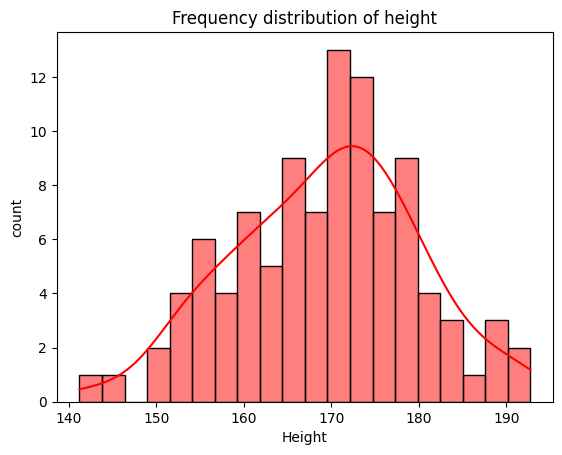

In [14]:
sns.histplot(data=df, x='Height_cm',bins=20, color='red',kde=True)
plt.title('Frequency distribution of height')
plt.xlabel('Height')
plt.ylabel('count')
plt.show()

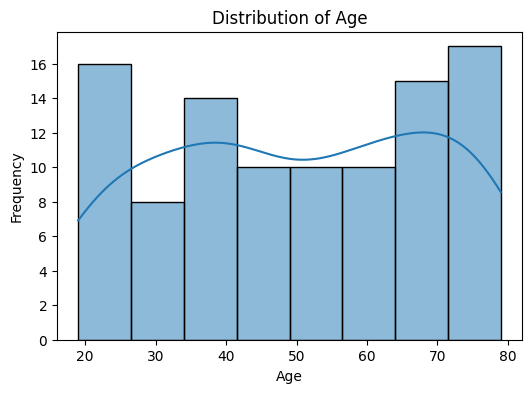

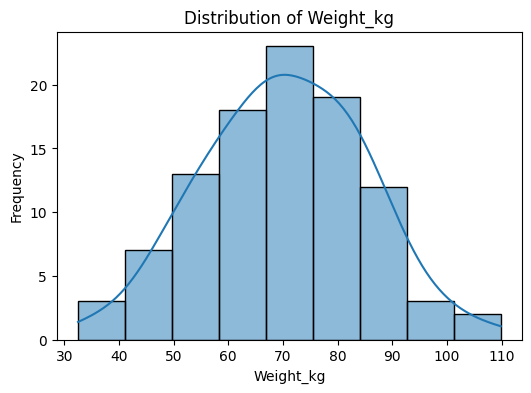

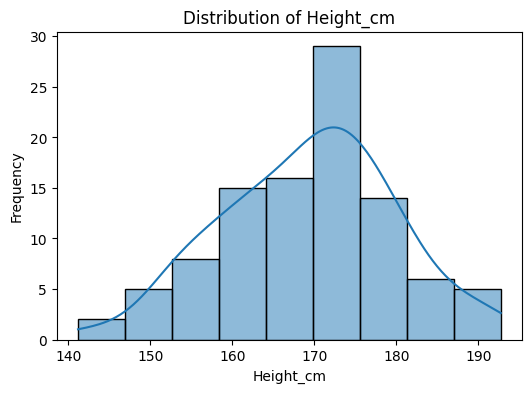

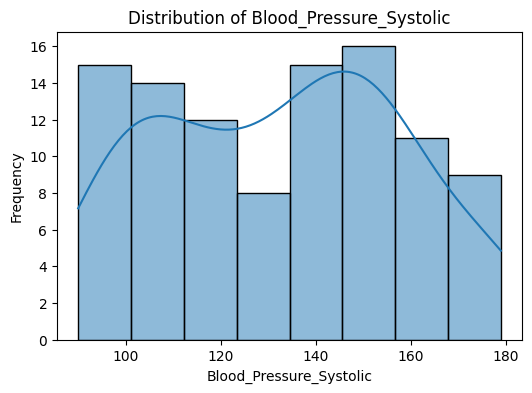

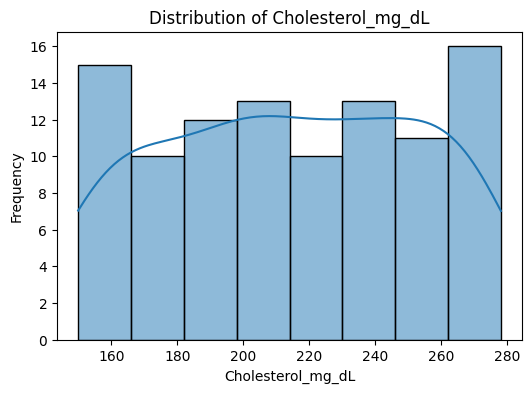

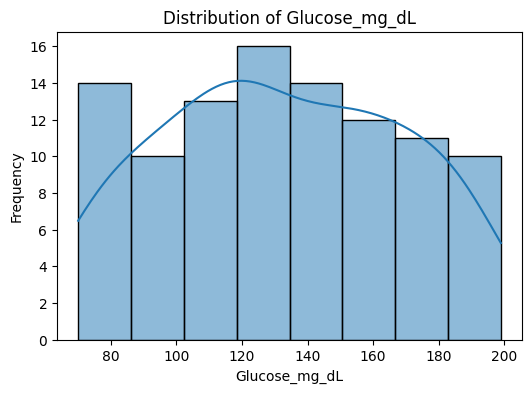

In [15]:
#SHORTCUT FOR GETTING ALL THE VALUES
columns = ['Age', 'Weight_kg', 'Height_cm', 'Blood_Pressure_Systolic',
           'Cholesterol_mg_dL', 'Glucose_mg_dL']

# Plot histograms with KDE (smooth line)
for col in columns:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f"Distribution of {col}")
    plt.xlabel(col)
    plt.ylabel("Frequency")
    plt.show()



In [16]:
correlation=df['Age'].corr(df['Cholesterol_mg_dL'])
print(correlation)


-0.17495834490583617


                          Patient_ID       Age  Weight_kg  Height_cm  \
Patient_ID                  1.000000 -0.017348  -0.058021  -0.129032   
Age                        -0.017348  1.000000  -0.039477  -0.002944   
Weight_kg                  -0.058021 -0.039477   1.000000  -0.110488   
Height_cm                  -0.129032 -0.002944  -0.110488   1.000000   
Blood_Pressure_Systolic     0.020941 -0.030287   0.196337   0.074459   
Blood_Pressure_Diastolic    0.081196  0.074940   0.101042   0.071421   
Cholesterol_mg_dL           0.019478 -0.174958  -0.085068   0.025068   
Glucose_mg_dL               0.022776 -0.069766  -0.003373   0.081791   
Heart_Rate_bpm             -0.093479 -0.035866  -0.048193   0.072705   

                          Blood_Pressure_Systolic  Blood_Pressure_Diastolic  \
Patient_ID                               0.020941                  0.081196   
Age                                     -0.030287                  0.074940   
Weight_kg                                0

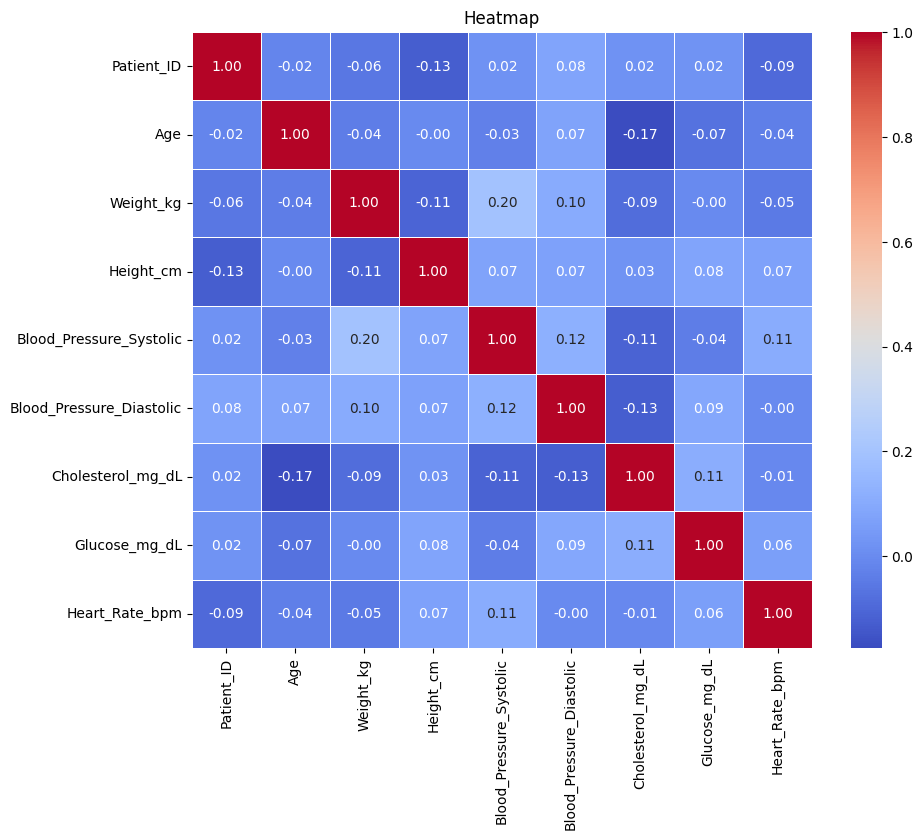

In [18]:
correlation_matrix=df.corr(numeric_only=True)
print(correlation_matrix)
plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix,annot=True,cmap='coolwarm',fmt=".2f",linewidths=0.6)
plt.title("Heatmap")
plt.show()

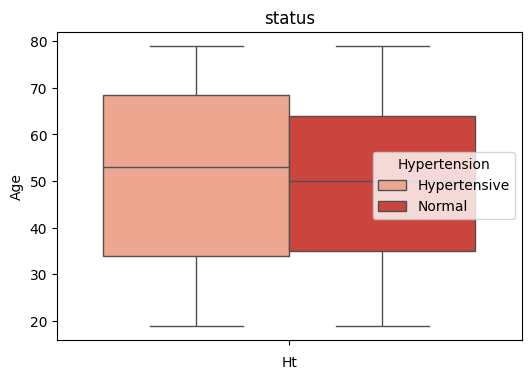

In [23]:
df['Hypertension']=df['Blood_Pressure_Systolic'].apply(lambda x: 'Hypertensive' if x>=130 else'Normal')
plt.figure(figsize=(6, 4))
sns.boxplot(hue='Hypertension',y='Age',data=df, palette='Reds', legend=True)
plt.title('status')
plt.xlabel('Ht')
plt.ylabel("Age")
plt.show()
